Learning pandana through its git demo

https://github.com/UDST/pandana/blob/dev/examples/Pandana-demo.ipynb

1. Loading data

Load street networks directly from Open Street Map (This requires installing a Pandana extension called OSMnet.)

In [5]:
# pip install osmnet
from pandana.loaders import osm

import warnings
warnings.filterwarnings('ignore')

In [6]:
# bbox = [long_min, lat_min, long_max, lat_max]
# bbox for Gipuzkoa
lat_max = 43.39526782
long_max = -1.72713422
lat_min = 42.89690109
long_min = -2.6032552
bbox = (lat_min,long_min,lat_max,long_max)

By default the generated network contains only walkable routes, specify type='drive' to get driveable routes. These networks have one impedance set, named 'distance', which is the distance between nodes in meters.

pdna_network_from_bbox uses the UDST library OSMnet to download and process OpenStreetMap (OSM) street network data

In [22]:
network = osm.pdna_network_from_bbox(42.89690109,-2.6032552,43.39526782,-1.72713422,)  # Gipuzkoa

Requesting network data within bounding box from Overpass API in 4 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.89690109,-2.60325894,43.14928796,-2.16340993);>;);out;'}"
Downloaded 46,730.7KB from www.overpass-api.de in 2.85 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.14691732,-2.60325894,43.39610678,-2.15998958);>;);out;'}"
Downloaded 34,849.4KB from www.overpass-api.de in 2.13 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!

Saving a Network to HDF5 is a way to share a Network or to preserve it between sessions. For example. you can build a Network using the OpenStreetMap API, then save the Network to HDF5 so you can reuse it without querying OSM again. Users will typically use the save_hdf5() and from_hdf5() methods.

What does the network look like?

Edges and nodes are visible as DataFrames.

In [17]:
network.nodes_df.head()

,x,y
id,,
343943,-2.463570,43.183845
343949,-2.470075,43.180540
423022,-2.528159,43.176193
448090,-2.532926,43.172130
451289,-2.438172,43.192781


In [18]:
network.edges_df.head()

,,from,to,distance
833859,301662479,833859,301662479,20.132225
5462312,299850007,5462312,299850007,56.146191
299850007,299850058,299850007,299850058,368.407367
281522858,27163390,281522858,27163390,1215.620775
27163390,6602697265,27163390,6602697265,303.278052


Saving and reloading networks

You can't directly save a Pandana network object, but you can easily recreate it from the nodes and edges.

In [11]:
network.nodes_df.to_csv('nodes.csv')
network.edges_df.to_csv('edges.csv')

In [12]:
import pandas as pd

nodes = pd.read_csv('nodes.csv', index_col=0)
edges = pd.read_csv('edges.csv', index_col=[0,1])

In [13]:
import pandana

network = pandana.Network(nodes['x'], nodes['y'], 
                          edges['from'], edges['to'], edges[['distance']])

2. Shortest paths

Load some restaurant locations

Here we'll load the locations of restaurants listed on Open Street Map (using the same OSMnet extension as above), and then calculate some shortest paths between them.

In [10]:
restaurants = osm.node_query(
    42.89690109,-2.6032552,43.39526782,-1.72713422, tags='"amenity"="restaurant"')

Choose two at random:

In [11]:
res = restaurants.sample(2)
res

,lat,lon,amenity,name,note,addr:housenumber,addr:street,check_date,payment:mastercard,payment:visa,...,payment:nfc,survey:date,check_date:opening_hours,opening_hours:signed,name:de,diet:healthy,food,dog,payment:qr_code,addr:door
id,,,,,,,,,,,,,,,,,,,,,
618300721,43.128262,-2.539756,restaurant,Tanger jatetxea,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6393107953,43.300912,-2.015278,restaurant,Casa Agus,NaN,45B,Portuetxe bidea,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate the shortest route between them

In [19]:
nodes = network.get_node_ids(res.lon, res.lat).values
nodes

array([12506832861,  1943947788], dtype=int64)

Then get the routing between the nodes.

In [20]:
network.shortest_path(nodes[0], nodes[1])

array([12506832861,   297598550,  2219857029,   297598523,   549207369,
        2360966552,   297598503,  1945037261,   549216116,   549215576,
         293037716, 12506832823,  2189086519,   300535230,    32257893,
         300550446,   766688667, 10753276336, 10753276337,    32257914,
         297469240, 10753276335,   303899677,   297469262, 12504460987,
       12504460981,    32257942,   297469126,   297469119,     5622940,
            470873,   297469175,   297469176,   297469179,   303897753,
         300554481, 12504507747,  2232375421,  3896993606,   300554484,
            470858,   300554516,   300554515,  2235216934,   300554558,
            470830, 12346380088,   310559926,      470782,      470781,
            470779,   624629219, 12461887888,     6928929, 12461887896,
           6731482,    25760601,     6731487,     6986229,    25874006,
           6986233,    25433269,    25439644,    25439588,   416322564,
          25439614,  8015977041,  9468095477,    25439630, 12382

In [21]:
network.shortest_path_length(nodes[0], nodes[1])

58511.8

Calculate many shortest paths at once

Pandana can generate several million shortest paths in less than a minute.

In [19]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat).values

In [20]:
origs = [o for o in restaurant_nodes for d in restaurant_nodes]
dests = [d for o in restaurant_nodes for d in restaurant_nodes]

In [21]:
%%time
distances = network.shortest_path_lengths(origs, dests)

CPU times: total: 1min 35s
Wall time: 25.9 s


Now we have the distance from each restaurant to each other restaurant.

In [22]:
pd.Series(distances).describe()

count    9.741690e+05
mean     6.558483e+04
std      3.823757e+05
min      0.000000e+00
25%      1.547632e+04
50%      2.787595e+04
75%      4.720361e+04
max      4.294967e+06
dtype: float64

3. Proximity

Find the closest restaurants to each node

To do a network-wide calculation like this, we first need to formally add the restaurants into the network.

In [24]:
network.set_pois(category = 'restaurants',
                 maxdist = 1000,
                 maxitems = 3,
                 x_col = restaurants.lon, 
                 y_col = restaurants.lat)

(The maxdist and maxitems parameters are the maximum distance and item counts you anticipate using in proximity searches, so that Pandana can optimize the caching.)

Now we can run the query.

In [25]:
results = network.nearest_pois(distance = 1000,
                               category = 'restaurants',
                               num_pois = 3,
                               include_poi_ids = True)
results.head()

,1,2,3,poi1,poi2,poi3
id,,,,,,
451277,498.864990,632.142029,1000.000000,1.204949e+10,1.069360e+10,NaN
451289,1000.000000,1000.000000,1000.000000,NaN,NaN,NaN
451290,1000.000000,1000.000000,1000.000000,NaN,NaN,NaN
451291,212.623001,329.417999,566.120972,1.069360e+10,1.204949e+10,306283698.0
469499,58.217999,953.028992,1000.000000,1.138508e+10,9.333773e+09,NaN


These are the distances (in meters) and IDs of the three closest restaurants to each network node.

4. Accessibility

How many restaurants are within 500 meters of each node?

Pandana calls this kind of calculation an aggregation. It requires passing a list of network nodes and associated values.

In this case, the "value" is just presence of a restaurant, but it could also be characteristics like square footage of a building or income of a household.

In [26]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat)

In [27]:
network.set(restaurant_nodes, 
            name = 'restaurants')

In [28]:
accessibility = network.aggregate(distance = 500,
                                  type = 'count',
                                  name = 'restaurants')
accessibility.describe()

count    123258.000000
mean          1.829455
std           5.526980
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          90.000000
dtype: float64

5. Visualization

Pandana's built-in plot function uses an older Matplotlib extension called Basemap that's now difficult to install. So here we'll just use Matplotlib directly.

Mapping restaurant accessibility

In [29]:
import matplotlib
from matplotlib import pyplot as plt

print(matplotlib.__version__)

3.9.0


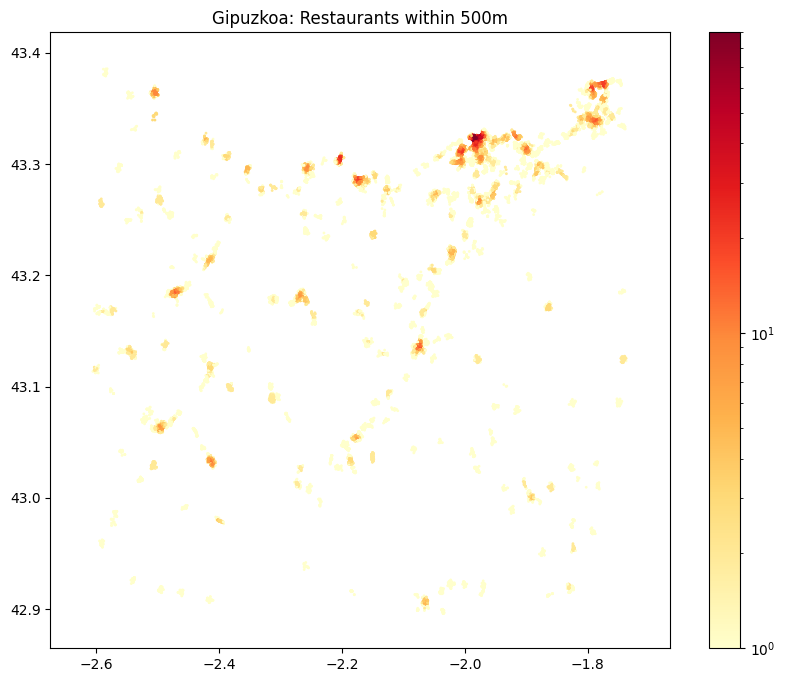

In [31]:
fig, ax = plt.subplots(figsize=(10,8))

plt.title('Gipuzkoa: Restaurants within 500m')
plt.scatter(network.nodes_df.x, network.nodes_df.y, 
            c=accessibility, s=1, cmap='YlOrRd', 
            norm=matplotlib.colors.LogNorm())
cb = plt.colorbar()

plt.show()